# 10. 신경망 회귀 모델

In [1]:
!wget -N https://github.com/DNRY/tfopt/raw/main/notebooks/helper.py

--2022-10-08 10:31:03--  https://github.com/DNRY/tfopt/raw/main/notebooks/helper.py
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DNRY/tfopt/main/notebooks/helper.py [following]
--2022-10-08 10:31:03--  https://raw.githubusercontent.com/DNRY/tfopt/main/notebooks/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7133 (7.0K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   6.97K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2022-10-08 10:31:03 (69.4 MB/s) - ‘helper.py’ saved [7133/7133]



## 10.1 신경망 모델의 필요성

In [2]:
from matplotlib.patches import Rectangle
def visualize_l2(pred, x_input, y_train):
    plt.plot(x_input, y_train, '.k', markerfacecolor='none')
    plt.plot(x_input, pred,  '--k')
    currentAxis = plt.gca()
    for k, (xx,yy) in enumerate(zip(x_train, y_train)):
        error = pred[k] - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')

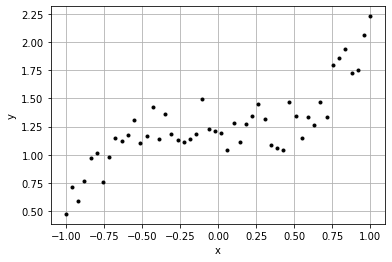

In [3]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from helper import generate_batches
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1 * x_train**2 -0.15 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
features1 = np.array([[xval] for xval in x_train])
features2 = np.array([[xval**2, xval] for xval in x_train])
features3 = np.array([[xval**3, xval**2, xval] for xval in x_train])
features4 = np.array([[np.cos(np.pi * xval), np.sin(np.pi * xval)] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [5]:
class MyModel(tf.keras.Model):
    def __init__(self, dim=1, **kwargs):
        super().__init__(**kwargs)
        self.W = tf.Variable(tf.ones([dim,1]), dtype=tf.float32) 
        self.b = tf.Variable(tf.ones([1]), dtype=tf.float32) 

    def call(self, x):
        return tf.matmul(x, self.W) + self.b

loss = lambda y, yhat: tf.reduce_mean(tf.square( yhat - y ))

In [6]:
for i, features in enumerate([features1, features2, features3, features4], 1):
   	# 데이터 섞기
   	np.random.seed(320)
   	shuffled_id = np.arange(0, len(x_train))
   	np.random.shuffle(shuffled_id)
   	shuffled_x_train = features[shuffled_id]
   	shuffled_y_train = labels[shuffled_id]

   	# 예측모델과 손실함수
   	num_features = features.shape[1]
   	model = MyModel(num_features)

   	# 파라미터 설정 및 수치최적화 알고리즘
   	MaxEpochs = 15
   	batch_size = 10
   	lr = 0.1
   	optimizer = tf.keras.optimizers.Adam(lr)

   	# 스토캐스틱 방법
   	for epoch in range(MaxEpochs):
   		if epoch % 5 == 0:
   			curr_loss = loss(labels, model(features))
   			print(model.W.numpy(), model.b.numpy(), curr_loss.numpy())
   		for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
   			with tf.GradientTape() as tape:
   				curr_loss = loss(y_batch, model(x_batch))
   				gradients = tape.gradient(curr_loss, model.trainable_variables)
   				optimizer.apply_gradients(zip(gradients, model.trainable_variables))


[[1.]] [1.] 0.21256347
[[0.51351786]] [1.2713623] 0.0458722
[[0.4424447]] [1.2667447] 0.044767126
[[1.]
 [1.]] [1.] 0.2260313
[[-0.04760677]
 [ 0.54382205]] [1.2689111] 0.0485721
[[0.17435731]
 [0.46753988]] [1.1939602] 0.043223683
[[1.]
 [1.]
 [1.]] [1.] 0.57014674
[[ 0.43706974]
 [-0.01975727]
 [ 0.19586705]] [1.2126927] 0.030156713
[[0.610568  ]
 [0.15909205]
 [0.02455965]] [1.2120951] 0.022248514
[[1.]
 [1.]] [1.] 1.1056408
[[-0.27018577]
 [ 0.03585643]] [1.2154461] 0.13722548
[[-0.01640769]
 [ 0.10837884]] [1.252276] 0.107143074


In [7]:
for i, features in enumerate([features1, features2, features3, features4], 1):
    # 데이터 섞기
    np.random.seed(320)
    shuffled_id = np.arange(0, len(x_train))
    np.random.shuffle(shuffled_id)
    shuffled_x_train = features[shuffled_id]
    shuffled_y_train = labels[shuffled_id]

    # 예측모델과 손실함수
    num_features = features.shape[1]
    model = MyModel(num_features)

    # 파라미터 설정
    MaxEpochs = 15
    batch_size = 10
    lr = 0.1

    # 모델 컴파일
    model.compile(optimizer = tf.keras.optimizers.Adam(lr),
                  loss = tf.keras.losses.MeanSquaredError())
    # 모델 학습
    model.fit(shuffled_x_train, shuffled_y_train, 
              epochs = MaxEpochs, batch_size=batch_size, 
              shuffle=False)

Epoch 1/15
5/5 [==============================] - 0s 2ms/step - loss: 0.1322
Epoch 2/15
5/5 [==============================] - 0s 2ms/step - loss: 0.0596
Epoch 3/15
5/5 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 4/15
5/5 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 5/15
5/5 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 6/15
5/5 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 7/15
5/5 [==============================] - 0s 2ms/step - loss: 0.0470
Epoch 8/15
5/5 [==============================] - 0s 2ms/step - loss: 0.0455
Epoch 9/15
5/5 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 10/15
5/5 [==============================] - 0s 2ms/step - loss: 0.0458
Epoch 11/15
5/5 [==============================] - 0s 2ms/step - loss: 0.0453
Epoch 12/15
5/5 [==============================] - 0s 2ms/step - loss: 0.0454
Epoch 13/15
5/5 [==============================] - 0s 2ms/step - loss: 0.

## 10.3 신경망 모델 구현

In [8]:
features = np.array([[xval] for xval in x_train])

In [9]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 10 # 은닉층1의 노드 개수
        num_hidden2 = 10 # 은닉층2의 노드 개수

        # 은닉층 1 의 Weight 와 Bias
        self.W1 = tf.Variable(tf.random.normal([1, num_hidden1], seed=624)) 
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624)) 

        # 은닉층 2 의 Weight 와 Bias
        self.W2 = tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)) 
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624)) 

        # 출력층의 Weight 와 Bias
        self.W3 = tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)) 
        self.b3 = tf.Variable(tf.random.normal([1], seed=624)) 

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1 # 은닉층 1 의 로짓 계산
        h1 = tf.nn.sigmoid(l1) # 은닉층 1 의 활성함수 계산

        l2 = tf.matmul(h1, self.W2) + self.b2 # 은닉층 2 의 로짓 계산
        h2 = tf.nn.sigmoid(l2) # 은닉층 2 의 활성함수 계산

        yhat = tf.matmul(h2, self.W3) + self.b3 # 출력층에서 모델의 예측값 계산
        return yhat

In [10]:
model = MyModel()

In [11]:
MaxEpochs = 120
batch_size = 10
lr = 0.1
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

In [12]:
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

model.compile(optimizer = optimizer, loss = loss)
model.fit(shuffled_x_train, shuffled_y_train, 
          epochs = MaxEpochs, batch_size = batch_size, 
          shuffle = False, verbose=0)

2/2 [==============================] - 0s 12ms/step - loss: 0.0168


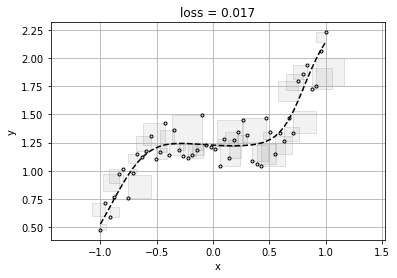

In [13]:
prediction_values = model.predict(features)
final_loss = model.evaluate(features,labels)
plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(prediction_values.reshape(-1), x_train, labels.reshape(-1))
plt.show()

## 10.4 신경망 모델의 다양한 표현

In [14]:
num_hidden1 = 10
num_hidden2 = 10
W1 = tf.constant_initializer(tf.Variable(tf.random.normal([1, num_hidden1], seed=624)).numpy())
b1 = tf.constant_initializer(tf.Variable(tf.random.normal([num_hidden1], seed=624)).numpy())

W2 = tf.constant_initializer(tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)).numpy())
b2 = tf.constant_initializer(tf.Variable(tf.random.normal([num_hidden2], seed=624)).numpy())

W3 = tf.constant_initializer(tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)).numpy())
b3 = tf.constant_initializer(tf.Variable(tf.random.normal([1], seed=624)).numpy())

class MyModel(tf.keras.Model):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)

      self.hidden1 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=W1, bias_initializer=b1, name='hidden_1')

      self.hidden2 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=W2, bias_initializer=b2, name='hidden_2')

      self.out = tf.keras.layers.Dense(1, activation = None,
        kernel_initializer=W3, bias_initializer=b3, name='output')

  def call(self, x):
      h1 = self.hidden1(x)
      h2 = self.hidden2(h1)
      yhat = self.out(h2)
      return yhat

2/2 [==============================] - 0s 7ms/step - loss: 0.0174


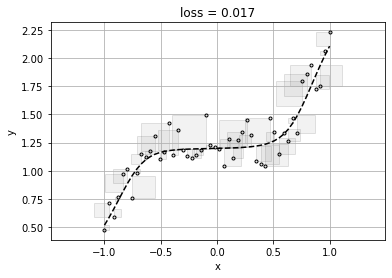

In [15]:
model = MyModel()

MaxEpochs = 120
batch_size = 10
lr = 0.1
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

model.compile(optimizer = optimizer, loss = loss)
model.fit(shuffled_x_train, shuffled_y_train, 
          epochs = MaxEpochs, batch_size = batch_size, 
          shuffle = False, verbose=0)

prediction_values = model.predict(features)
final_loss = model.evaluate(features,labels)
plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(prediction_values.reshape(-1), x_train, labels.reshape(-1))
plt.show()

In [16]:
for var in model.layers:
  var_name = var.trainable_variables[0].name
  var_shape = var.trainable_variables[0].shape
  print(var_name, var_shape, np.prod(var_shape))

  var_name = var.trainable_variables[1].name
  var_shape = var.trainable_variables[1].shape
  print(var_name, var_shape, np.prod(var_shape))

my_model_9/hidden_1/kernel:0 (1, 10) 10
my_model_9/hidden_1/bias:0 (10,) 10
my_model_9/hidden_2/kernel:0 (10, 10) 100
my_model_9/hidden_2/bias:0 (10,) 10
my_model_9/output/kernel:0 (10, 1) 10
my_model_9/output/bias:0 (1,) 1


## 10.5 신경망 모델의 단점

In [17]:
initializer = tf.keras.initializers.Zeros()

class MyModel(tf.keras.Model):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)
      # 은닉층 1
      self.hidden1 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_1')
      # 은닉층 2
      self.hidden2 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_2')
      # 출력
      self.out = tf.keras.layers.Dense(1, activation = None,
        kernel_initializer=initializer, bias_initializer=initializer, name='output')

  def call(self, x):
      h1 = self.hidden1(x) # 은닉층 1
      h2 = self.hidden2(h1) # 은닉층 2
      yhat = self.out(h2) # 출력층
      return yhat

2/2 [==============================] - 0s 7ms/step - loss: 0.0404


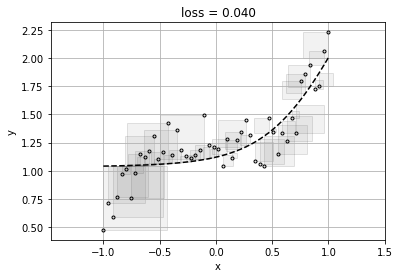

In [18]:
model = MyModel()

MaxEpochs = 120
batch_size = 10
lr = 0.1
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

model.compile(optimizer = optimizer, loss = loss)
model.fit(shuffled_x_train, shuffled_y_train, 
          epochs = MaxEpochs, batch_size = batch_size, 
          shuffle = False, verbose=0)

prediction_values = model.predict(features)
final_loss = model.evaluate(features,labels)
plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(prediction_values.reshape(-1), x_train, labels.reshape(-1))
plt.show()

In [19]:
initializer = tf.keras.initializers.Ones()

class MyModel(tf.keras.Model):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)
      # 은닉층 1
      self.hidden1 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_1')
      # 은닉층 2
      self.hidden2 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_2')
      # 출력
      self.out = tf.keras.layers.Dense(1, activation = None,
        kernel_initializer=initializer, bias_initializer=initializer, name='output')

  def call(self, x):
      h1 = self.hidden1(x) # 은닉층 1
      h2 = self.hidden2(h1) # 은닉층 2
      yhat = self.out(h2) # 출력층
      return yhat

2/2 [==============================] - 0s 11ms/step - loss: 0.0650


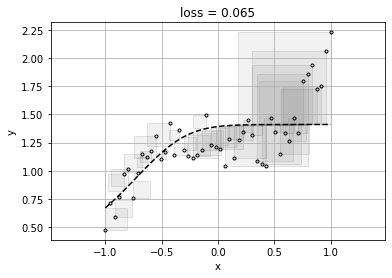

In [20]:
model = MyModel()

MaxEpochs = 120
batch_size = 10
lr = 0.1
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

model.compile(optimizer = optimizer, loss = loss)
model.fit(shuffled_x_train, shuffled_y_train, 
          epochs = MaxEpochs, batch_size = batch_size, 
          shuffle = False, verbose=0)

prediction_values = model.predict(features)
final_loss = model.evaluate(features,labels)
plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(prediction_values.reshape(-1), x_train, labels.reshape(-1))
plt.show()

In [21]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1., seed=119)

class MyModel(tf.keras.Model):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)

      self.hidden1 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_1')

      self.hidden2 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_2')

      self.out = tf.keras.layers.Dense(1, activation = None,
        kernel_initializer=initializer, bias_initializer=initializer, name='output')

  def call(self, x):
      h1 = self.hidden1(x)
      h2 = self.hidden2(h1)
      yhat = self.out(h2)
      return yhat

2/2 [==============================] - 0s 5ms/step - loss: 0.0200


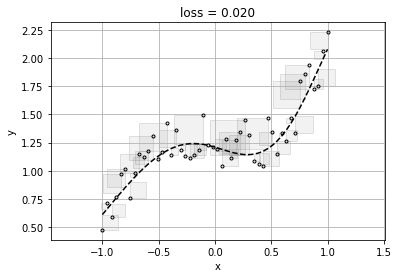

In [22]:
model = MyModel()

MaxEpochs = 120
batch_size = 10
lr = 0.1
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

model.compile(optimizer = optimizer, loss = loss)
model.fit(shuffled_x_train, shuffled_y_train, 
          epochs = MaxEpochs, batch_size = batch_size, 
          shuffle = False, verbose=0)

prediction_values = model.predict(features)
final_loss = model.evaluate(features,labels)
plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(prediction_values.reshape(-1), x_train, labels.reshape(-1))
plt.show()